<a href="https://colab.research.google.com/github/RodrigoOBC/Notebook_MarcineLearning/blob/master/OptimizacaoRedeNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
from torch import nn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch import optim
import numpy as np

In [2]:

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

In [8]:
feature = [0,9]
Vinhos =  datasets.load_wine()
np_Data  = Vinhos.data[: ,feature]
np_target = Vinhos.target

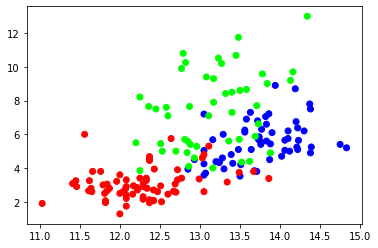

In [10]:
plt.scatter(np_Data[:, 0],np_Data[:,1],c=np_target, cmap=plt.cm.brg)

In [12]:
scaler =  StandardScaler()
np_Data = scaler.fit_transform(np_Data)

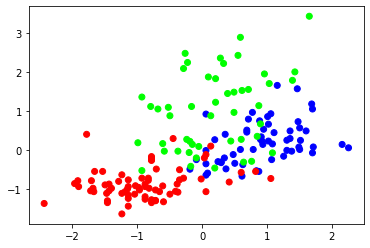

In [13]:
plt.scatter(np_Data[:, 0],np_Data[:,1],c=np_target, cmap=plt.cm.brg)

In [16]:
input = np_Data.shape[1]
hidden =  32
out = len(Vinhos.target_names)

In [17]:
redeN = nn.Sequential(
    nn.Linear(input,hidden),
    nn.ReLU(),
    nn.Linear(hidden, out),
    nn.Softmax()
)

redeN = redeN.to(device)

In [18]:
criterio = nn.CrossEntropyLoss().to(device)

In [28]:
optimize = optim.SGD(params=redeN.parameters(),lr=1e-3)

In [30]:
def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


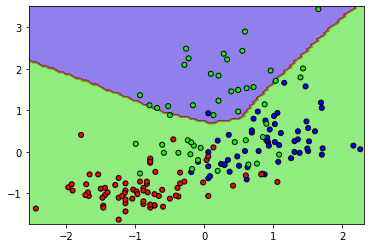

In [31]:
plot_boundary(np_Data, np_target, redeN)